# Loi de Benford et données d'abondance de protéines
Ce script a pour but de vérifier si l'abondance de protéines, d'un fichier d'abondance de protéines extrait depuis [PRIDE](https://www.ebi.ac.uk/pride/), suit la loi de Benford. Le jeu de données contient l'abondances de protéines chez *e.coli*, suite à une privation de carbone.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys

sys.path.insert(0, '..')

import benford

%load_ext autoreload
%autoreload 2

## Téléchargement du jeu de données

In [2]:
if not os.path.exists("e033784_Proteins.xlsx"):
    !wget https://www.ebi.ac.uk/pride/data/archive/2021/03/PXD024151/e033784_Proteins.xlsx

In [3]:
data = pd.read_excel('e033784_Proteins.xlsx')
data.shape

(2259, 31)

In [4]:
data.head()

,Checked,Protein FDR Confidence Combined,Master,Accession,Description,Exp q-value Combined,Sum PEP Score,Coverage in Percent,Number of Peptides,Number of PSMs,...,Abundances Normalized F4 Sample,Abundance F1 Sample,Abundance F2 Sample,Abundance F3 Sample,Abundance F4 Sample,Found in Sample in S1 F1 Sample,Found in Sample in S2 F2 Sample,Found in Sample in S3 F3 Sample,Found in Sample in S4 F4 Sample,Modifications
0,False,High,IsMasterProtein,P0A8V2,DNA-directed RNA polymerase subunit beta OS=Es...,0.0,669.114,72,95,794,...,2.233296e+09,2.107560e+09,1.126121e+09,8.542110e+08,2.765100e+08,High,High,High,High,NaN
1,False,High,IsMasterProtein,P0A8T7,DNA-directed RNA polymerase subunit beta' OS=E...,0.0,596.904,68,91,841,...,1.950036e+09,2.005228e+09,1.126856e+09,8.781706e+08,2.414389e+08,High,High,High,High,NaN
2,False,High,IsMasterProtein,P0A6F5,60 kDa chaperonin OS=Escherichia coli (strain ...,0.0,503.063,93,53,1435,...,5.664362e+09,4.516081e+09,2.140958e+09,1.842317e+09,7.013190e+08,High,High,High,High,NaN
3,False,High,IsMasterProtein,P0AFG8,Pyruvate dehydrogenase E1 component OS=Escheri...,0.0,450.292,72,75,758,...,3.326486e+09,3.315792e+09,1.710860e+09,1.433563e+09,4.118607e+08,High,High,High,High,NaN
4,False,High,IsMasterProtein,P0A705,Translation initiation factor IF-2 OS=Escheric...,0.0,424.883,73,74,429,...,9.685164e+08,1.348475e+09,6.278798e+08,4.037779e+08,1.199145e+08,High,High,High,High,NaN


In [5]:
data.columns

Index(['Checked', 'Protein FDR Confidence Combined', 'Master', 'Accession',
       'Description', 'Exp q-value Combined', 'Sum PEP Score',
       'Coverage in Percent', 'Number of Peptides', 'Number of PSMs',
       'Number of Unique Peptides', 'Number of Protein Groups',
       'Number of AAs', 'MW in kDa', 'calc pI', 'Score Sequest HT Sequest HT',
       'Number of Peptides by Search Engine Sequest HT',
       'Number of Razor Peptides', 'Abundances Normalized F1 Sample',
       'Abundances Normalized F2 Sample', 'Abundances Normalized F3 Sample',
       'Abundances Normalized F4 Sample', 'Abundance F1 Sample',
       'Abundance F2 Sample', 'Abundance F3 Sample', 'Abundance F4 Sample',
       'Found in Sample in S1 F1 Sample', 'Found in Sample in S2 F2 Sample',
       'Found in Sample in S3 F3 Sample', 'Found in Sample in S4 F4 Sample',
       'Modifications'],
      dtype='object')

On observe que dans ce jeu de donnée il y a 4 échantillons, avec les données brut et normalisées de l'abondance de protéines. Dans un premier temps, nous allons analyser l'ensemble du jeu de données pour les données normalisées et les données brut. Ensuite nous analuserons chaque échantillons individuellement.

## Analyse des données normalisées

### préparations de données

In [7]:
abundance_tot_norm = ['Abundances Normalized F1 Sample', 'Abundances Normalized F2 Sample',
                      'Abundances Normalized F3 Sample', 'Abundances Normalized F4 Sample']

abundance_tot_norm = data[abundance_tot_norm]
print(abundance_tot_norm.shape)

(2259, 4)


In [11]:
# données dans un array d'une dimmenssion
abundance_tot_norm = abundance_tot_norm.values.reshape(abundance_tot_norm.shape[0] * abundance_tot_norm.shape[1])
print(abundance_tot_norm.shape)
abundance_tot_norm

(9036,)


array([2.10755997e+09, 2.23397114e+09, 2.23728970e+09, ...,
                  nan,            nan,            nan])

In [13]:
# remove 0
abundance_tot_norm = abundance_tot_norm[abundance_tot_norm > 0]
print(abundance_tot_norm.shape)

(8096,)


### histograme de la distribution des données normalisées

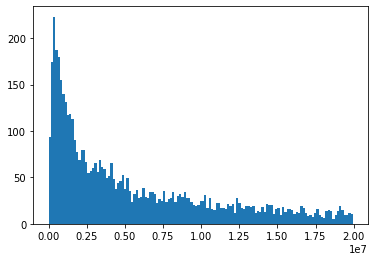

In [15]:
plt.hist(abundance_tot_norm, bins=range(0, 20_000_000, 150_000));

### Analyse pour le first digit

In [16]:
f_benford = benford.get_theoretical_freq_benford()
d_obs = benford.count_first_digit(abundance_tot_norm)

#### Histogramme de la fréquence des first digit de la loi de Benford et de l'abondance des protéines

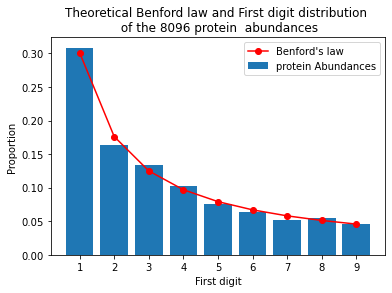

In [17]:
benford.build_hist_freq_ben(benford.normalize_first_digit(d_obs), f_benford, nb_digit=1,
                            title=("Theoretical Benford law and First digit distribution \n "
                            f"of the {sum(d_obs)} protein  abundances"),
                            legend="protein Abundances")

#### Test statistique par la procédure "bootstrap"

In [18]:
%%time
statistics, p_val, nb_signif = benford.calculate_bootstrap_chi2(abundance_tot_norm, f_benford, nb_digit=1)

statistics : 10.147838350932842 ; p-value : 0.2548025945645502 ; number of significant tests : 135
CPU times: user 2.38 s, sys: 8.5 ms, total: 2.39 s
Wall time: 2.39 s


In [22]:
if p_val > 0.05:
    print("Le résultat du test montre que le premier chiffre significatif de",
          "l'abondance de protéines sur \nl'ensemble des données normalisées suit la loi de Benford pour un risque 𝛼=5%.")
else:
    print("Le résultat du test montre que le premier chiffre significatif de",
          "l'abondance de protéines sur \nl'ensemble des données normalisées ne suit pas la loi de Benford pour un ",
          "risque 𝛼=5%.")

Le résultat du test montre que le premier chiffre significatif de l'abondance de protéines sur 
l'ensemble des données normalisées suit la loi de Benford pour un risque 𝛼=5%.


### Analyse pour les deux premiers chiffres significatifs

In [23]:
f_benford = benford.get_theoretical_freq_benford(2)
d_obs = benford.count_first_digit(abundance_tot_norm, 2)

#### Histogramme de la fréquence des first digit de la loi de Benford et de l'abondance des protéines

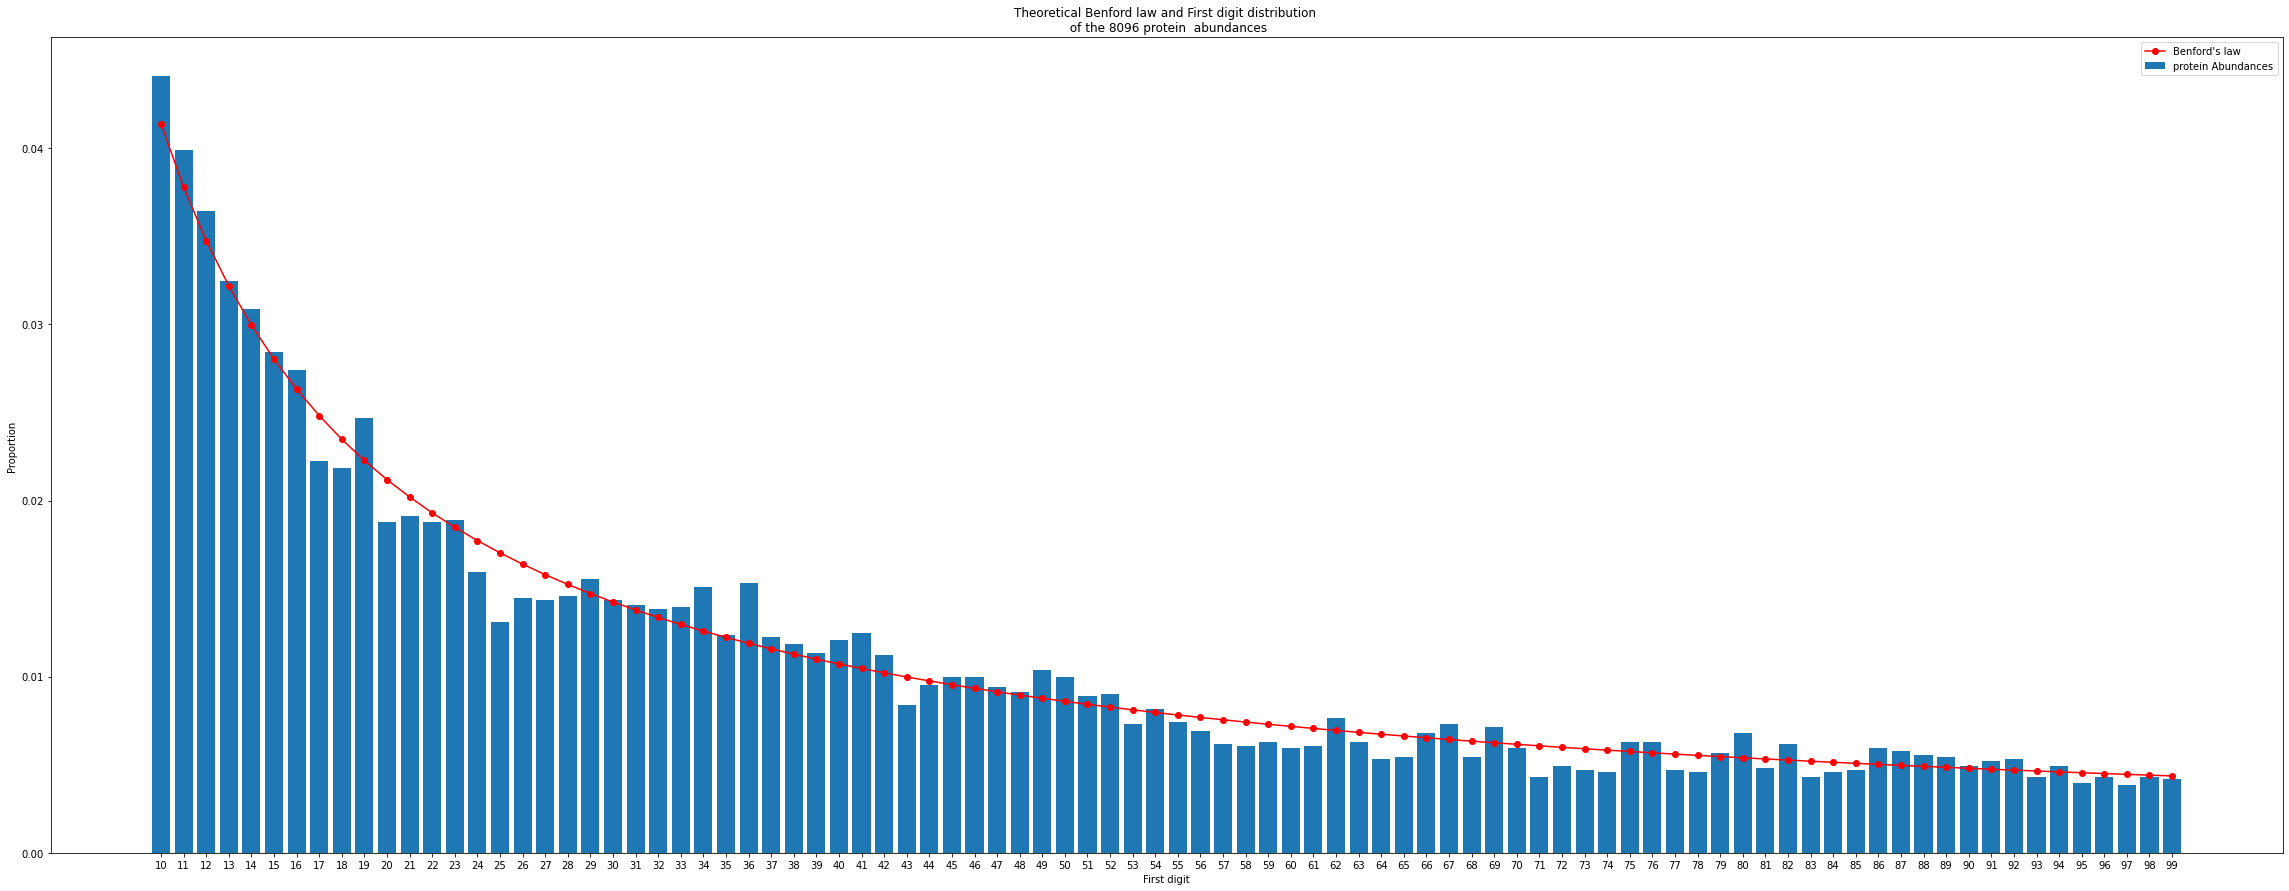

In [24]:
benford.build_hist_freq_ben(benford.normalize_first_digit(d_obs), f_benford, nb_digit=2,
                            title=("Theoretical Benford law and First digit distribution \n "
                            f"of the {sum(d_obs)} protein  abundances"),
                            legend="protein Abundances", size=(40, 15))

#### Test statistique par la procédure "bootstrap"

In [25]:
%%time
statistics, P_val, nb_signif = benford.calculate_bootstrap_chi2(abundance_tot_norm, f_benford, nb_digit=2)

statistics : 89.66958877812695 ; p-value : 0.46016151073431116 ; number of significant tests : 56
CPU times: user 2.58 s, sys: 4.82 ms, total: 2.59 s
Wall time: 2.59 s


In [27]:
if p_val > 0.05:
    print("Le résultat du test montre que les 2 premiers chiffres significatifs de",
          "l'abondance de protéines \nsur l'ensemble des données normalisées suit la loi",
          "de Benford pour un risque 𝛼=5%.")
else:
    print("Le résultat du test montre que les 2 premiers chiffres significatifs de",
          "l'abondance de protéines \nsur l'ensemble des données normalisées ne suit",
          "pas la loi de Benford pour un risque 𝛼=5%.")

Le résultat du test montre que les 2 premiers chiffres significatifs de l'abondance de protéines 
sur l'ensemble des données normalisées suit la loi de Benford pour un risque 𝛼=5%.


## Analyse des données brut

### préparations de données

In [28]:
abundance_tot = ['Abundance F1 Sample', 'Abundance F2 Sample',
                 'Abundance F3 Sample', 'Abundance F4 Sample']

abundance_tot = data[abundance_tot]
print(abundance_tot.shape)

(2259, 4)


In [29]:
# données dans un array d'une dimmenssion
abundance_tot = abundance_tot.values.reshape(abundance_tot.shape[0] * abundance_tot.shape[1])
print(abundance_tot.shape)
abundance_tot

(9036,)


array([2.10755997e+09, 1.12612097e+09, 8.54210980e+08, ...,
                  nan,            nan,            nan])

In [30]:
# remove 0
abundance_tot = abundance_tot[abundance_tot > 0]
print(abundance_tot.shape)

(8096,)


### Analyse pour le first digit

In [31]:
f_benford = benford.get_theoretical_freq_benford()
d_obs = benford.count_first_digit(abundance_tot)

#### Histogramme de la fréquence des first digit de la loi de Benford et de l'abondance des protéines

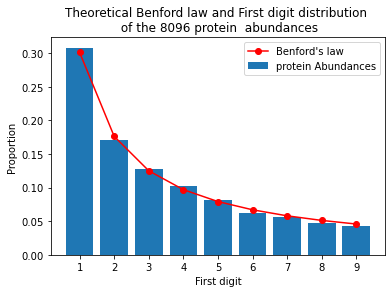

In [32]:
benford.build_hist_freq_ben(benford.normalize_first_digit(d_obs), f_benford, nb_digit=1,
                            title=("Theoretical Benford law and First digit distribution \n "
                            f"of the {sum(d_obs)} protein  abundances"),
                            legend="protein Abundances")

#### Test statistique par la procédure "bootstrap"

In [33]:
%%time
statistics, p_val, nb_signif = benford.calculate_bootstrap_chi2(abundance_tot, f_benford, nb_digit=1)

statistics : 8.602149848930672 ; p-value : 0.37696068853795 ; number of significant tests : 73
CPU times: user 2.24 s, sys: 5.43 ms, total: 2.24 s
Wall time: 2.24 s


In [35]:
if p_val > 0.05:
    print("Le résultat du test montre que le premier chiffre significatif de",
          "l'abondance de protéines sur \nl'ensemble des données brut suit la loi de Benford pour un risque 𝛼=5%.")
else:
    print("Le résultat du test montre que le premier chiffre significatif de",
          "l'abondance de protéines sur \nl'ensemble des données brut ne suit pas la loi de Benford pour un ",
          "risque 𝛼=5%.")

Le résultat du test montre que le premier chiffre significatif de l'abondance de protéines sur 
l'ensemble des données brut suit la loi de Benford pour un risque 𝛼=5%.


### Analyse pour les deux premiers chiffres significatifs

In [36]:
f_benford = benford.get_theoretical_freq_benford(2)
d_obs = benford.count_first_digit(abundance_tot, 2)

#### Histogramme de la fréquence des first digit de la loi de Benford et de l'abondance des protéines

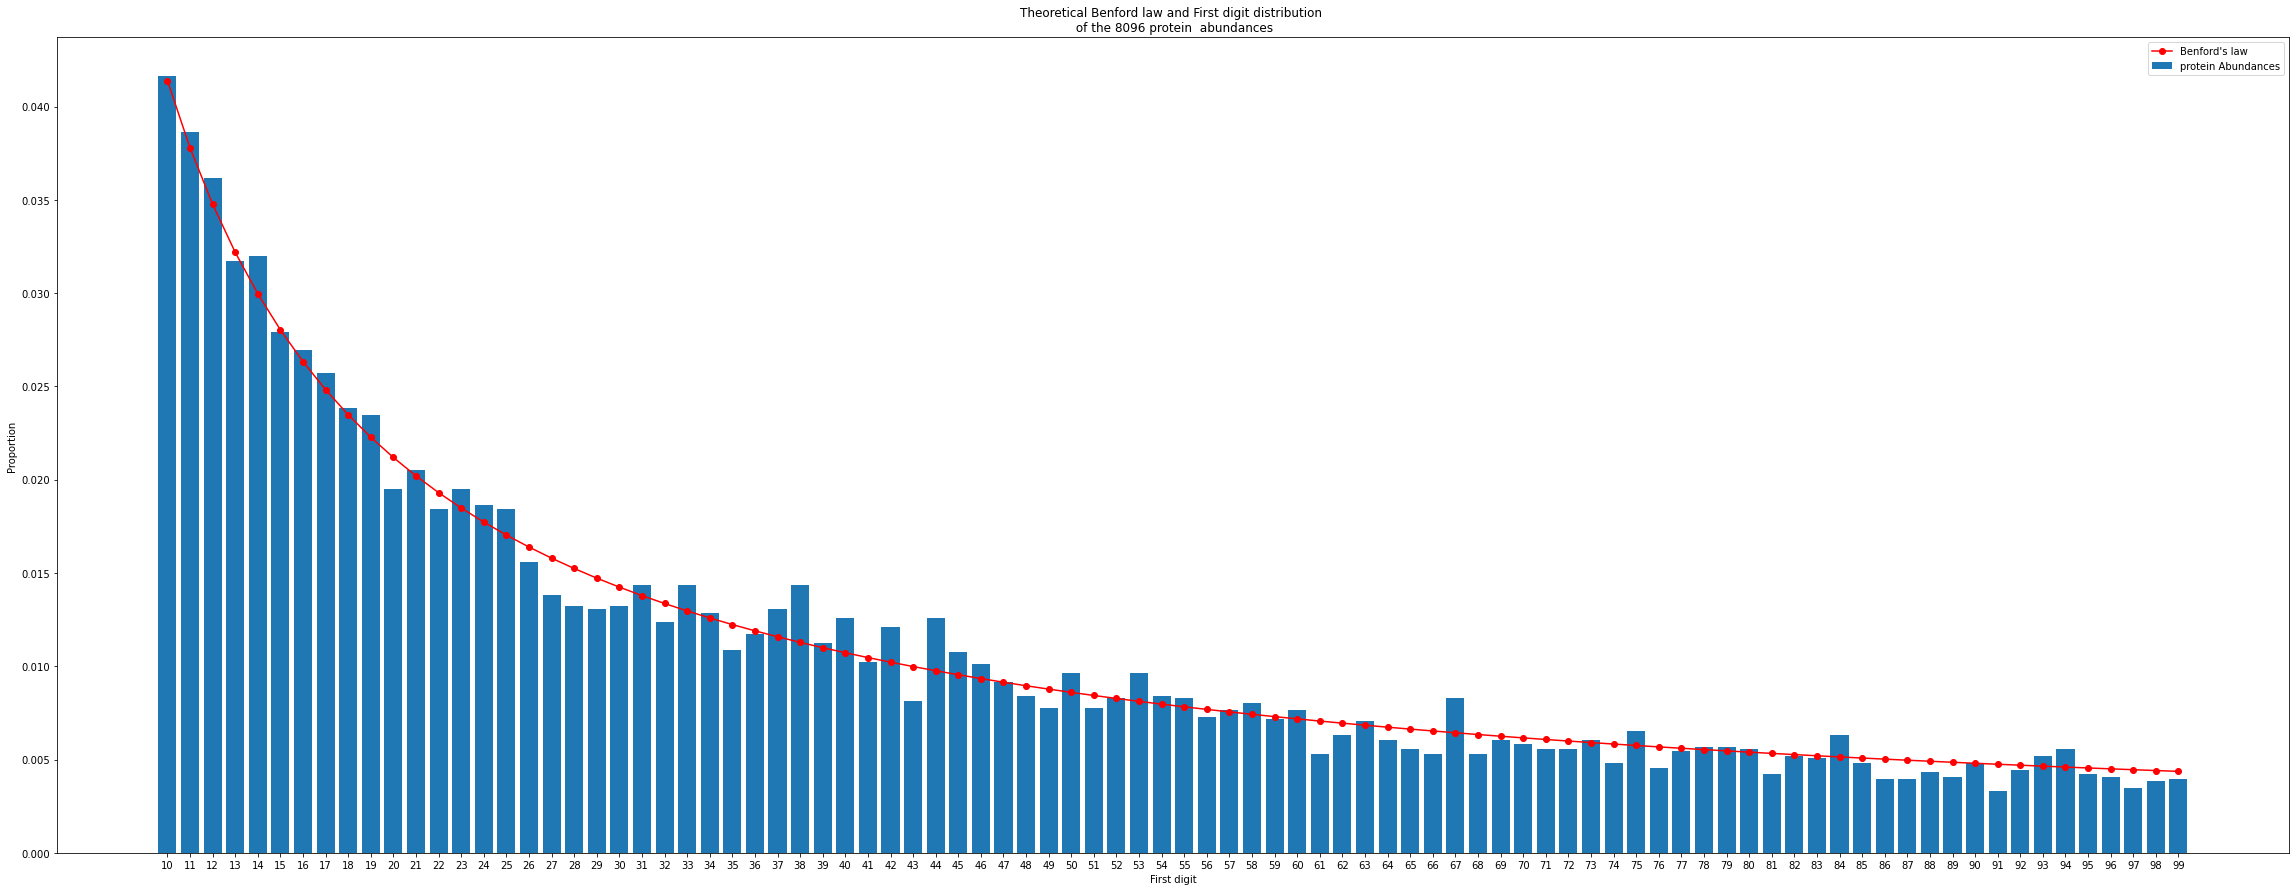

In [37]:
benford.build_hist_freq_ben(benford.normalize_first_digit(d_obs), f_benford, nb_digit=2,
                            title=("Theoretical Benford law and First digit distribution \n "
                            f"of the {sum(d_obs)} protein  abundances"),
                            legend="protein Abundances", size=(40, 15))

#### Test statistique par la procédure "bootstrap"

In [38]:
%%time
statistics, P_val, nb_signif = benford.calculate_bootstrap_chi2(abundance_tot, f_benford, nb_digit=2)

statistics : 87.59338599474724 ; p-value : 0.5223009312151822 ; number of significant tests : 43
CPU times: user 2.56 s, sys: 7.39 ms, total: 2.57 s
Wall time: 2.57 s


In [39]:
if p_val > 0.05:
    print("Le résultat du test montre que les 2 premiers chiffres significatifs de",
          "l'abondance de protéines \nsur l'ensemble des données brut suit la loi",
          "de Benford pour un risque 𝛼=5%.")
else:
    print("Le résultat du test montre que les 2 premiers chiffres significatifs de",
          "l'abondance de protéines \nsur l'ensemble des données brut ne suit",
          "pas la loi de Benford pour un risque 𝛼=5%.")

Le résultat du test montre que les 2 premiers chiffres significatifs de l'abondance de protéines 
sur l'ensemble des données brut suit la loi de Benford pour un risque 𝛼=5%.


On remarque que la p-value des données brut est plus élevé que celle des données normalisées.  

Nous allons maintenant réaliser l'analyse sur chacun des 4 échantillons pour les données normalisées.  

## Analyse des échantillons normalisées

### préparations de données

In [41]:
abundance_norm_id = ['Abundances Normalized F1 Sample', 'Abundances Normalized F2 Sample',
                     'Abundances Normalized F3 Sample', 'Abundances Normalized F4 Sample']

ech_name = ["normalized F1", "normalized F2", "normalized F3", "normalized F4"]
pval_list = []
stat_list = []

statistics : 8.51046269147176 ; p-value : 0.38525757413810824 ; number of significant tests : 32
statistics : 9.570517840146497 ; p-value : 0.29647218242527 ; number of significant tests : 79
statistics : 10.908909230375858 ; p-value : 0.20691414389318882 ; number of significant tests : 168
statistics : 8.07667293697611 ; p-value : 0.42601656307492164 ; number of significant tests : 32
CPU times: user 9.27 s, sys: 26.9 ms, total: 9.3 s
Wall time: 9.29 s


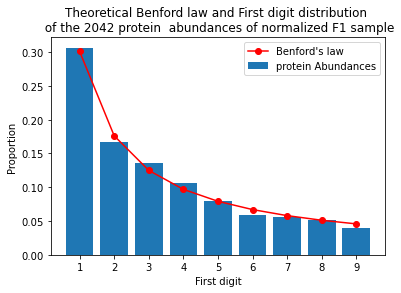

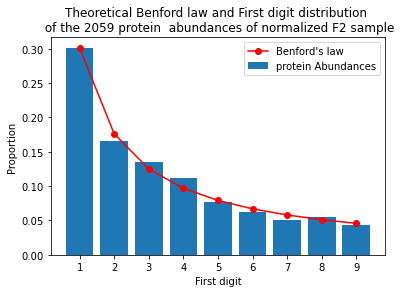

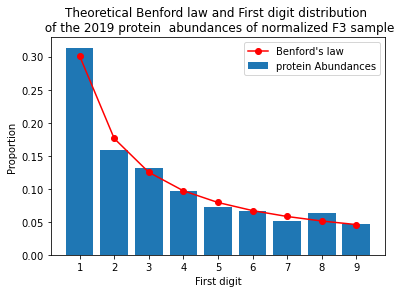

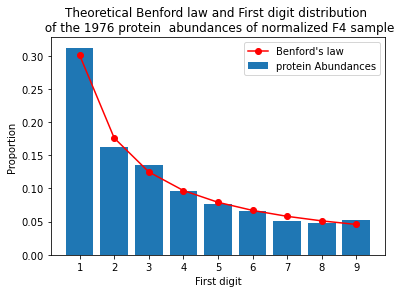

In [43]:
%%time
pval_list = []
stat_list = []
f_benford = benford.get_theoretical_freq_benford()
for i in range(len(abundance_norm_id)):
    abundance_norm_ech = data[abundance_norm_id[i]]
    # remove 0
    abundance_norm_ech = abundance_norm_ech[abundance_norm_ech > 0]
    # récupération des first digit
    d_obs = benford.count_first_digit(abundance_norm_ech)
    # histogramme
    benford.build_hist_freq_ben(benford.normalize_first_digit(d_obs), f_benford, nb_digit=1,
                            title=("Theoretical Benford law and First digit distribution \n "
                            f"of the {sum(d_obs)} protein  abundances of {ech_name[i]} sample"),
                            legend="protein Abundances")
    # test statistique
    statistics, p_val, nb_signif = benford.calculate_bootstrap_chi2(abundance_norm_ech, f_benford, nb_digit=1)
    pval_list.append(p_val); stat_list.append(statistics);

In [51]:
raw_name = ["p-value", "Statistics"]
pd.DataFrame((pval_list, stat_list), index=raw_name, columns=abundance_norm_id)

,Abundances Normalized F1 Sample,Abundances Normalized F2 Sample,Abundances Normalized F3 Sample,Abundances Normalized F4 Sample
p-value,0.385258,0.296472,0.206914,0.426017
Statistics,8.510463,9.570518,10.908909,8.076673


Les données normalisées des 4 échantillons suivent la loi de Benford pour un risque $\alpha$ de 5%.

## Analyse des échantillons brut

### préparations de données

In [52]:
abundance_id = ['Abundance F1 Sample', 'Abundance F2 Sample',
                'Abundance F3 Sample', 'Abundance F4 Sample']

ech_name = ["F1", "F2", "F3", "F4"]
pval_list = []
stat_list = []

statistics : 8.359837433505723 ; p-value : 0.3991323727993001 ; number of significant tests : 35
statistics : 6.747530906993122 ; p-value : 0.5641010656434375 ; number of significant tests : 13
statistics : 12.858252526099628 ; p-value : 0.11682064994160327 ; number of significant tests : 267
statistics : 6.291428981170296 ; p-value : 0.6146233125726501 ; number of significant tests : 8
CPU times: user 9.12 s, sys: 30.2 ms, total: 9.15 s
Wall time: 9.16 s


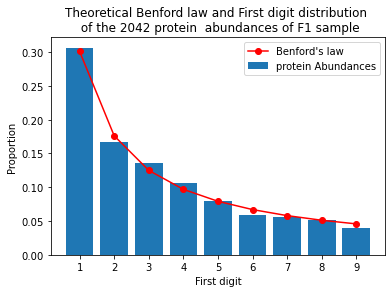

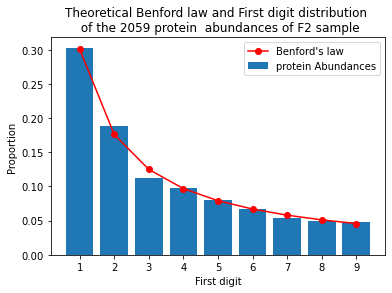

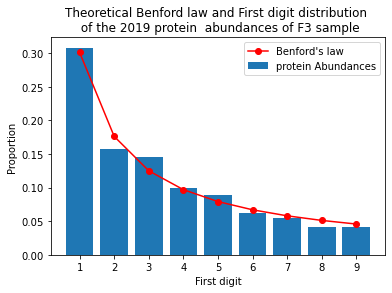

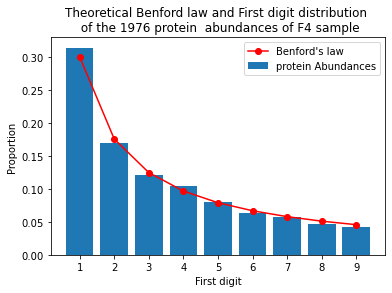

In [53]:
%%time
pval_list = []
stat_list = []
f_benford = benford.get_theoretical_freq_benford()
for i in range(len(abundance_id)):
    abundance_ech = data[abundance_id[i]]
    # remove 0
    abundance_ech = abundance_ech[abundance_ech > 0]
    # récupération des first digit
    d_obs = benford.count_first_digit(abundance_ech)
    # histogramme
    benford.build_hist_freq_ben(benford.normalize_first_digit(d_obs), f_benford, nb_digit=1,
                            title=("Theoretical Benford law and First digit distribution \n "
                            f"of the {sum(d_obs)} protein  abundances of {ech_name[i]} sample"),
                            legend="protein Abundances")
    # test statistique
    statistics, p_val, nb_signif = benford.calculate_bootstrap_chi2(abundance_ech, f_benford, nb_digit=1)
    pval_list.append(p_val); stat_list.append(statistics);

In [54]:
raw_name = ["p-value", "Statistics"]
pd.DataFrame((pval_list, stat_list), index=raw_name, columns=abundance_id)

,Abundance F1 Sample,Abundance F2 Sample,Abundance F3 Sample,Abundance F4 Sample
p-value,0.399132,0.564101,0.116821,0.614623
Statistics,8.359837,6.747531,12.858253,6.291429


Les données brut des 4 échantillons suivent la loi de Benford pour un risque $\alpha$ de 5%

# Conclusion

Les données brut et normalisées d'abondance de protéines pour les 4 échantillons, de _e.coli_ en privation de carbone, suivent la loi de Benford pour un risque $\alpha$ de 5%